<a href="https://colab.research.google.com/github/larregui/BigDataAnalytics/blob/main/UFO_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from textblob import TextBlob
%matplotlib inline

In [2]:
df=pd.read_csv("/content/newufo.csv")

In [ ]:
abducted = df[df['comments'].str.contains('abducted')]
print("Reports with the word abducted",len(abducted))
youtube = df[df['comments'].str.contains('youtube.com/')]
print("Reports with the youtube hyperlinks",len(youtube))
nuforc_note = df[df['comments'].str.contains('NUFORC Note')]
print("Reports with the NUFORC notes",len(nuforc_note))
print("Size of the dataframe",len(df))
nuforc1 = df[(df['comments'].str.contains('NUFORC Note')) & (df['comments'].str.contains('contacted'))]
nuforc2 = df[(df['comments'].str.contains('NUFORC Note')) & (df['comments'].str.contains('talked'))]
nuforc = nuforc1.merge(nuforc2, how='outer', left_index=True, right_index=True)
print("Estimate no. of reports NUFORC seeked or made contact with a witness",len(nuforc))

Reports with the word abducted 20
Reports with the youtube hyperlinks 10
Reports with the NUFORC notes 2119
Size of the dataframe 65101
Estimate no. of reports NUFORC seeked or made contact with a witness 1


List the top 15 cities which report sightings the most

In [ ]:
df_state = pd.DataFrame(df.groupby('state')['comments'].nunique())
top_15_state = df_state.sort_values('comments', ascending=False)[:15]
top_15_state

,comments
state,
ca,8900
wa,3961
fl,3832
tx,3440
ny,2976
il,2494
az,2413
pa,2362
oh,2272


In [7]:
df_state = pd.DataFrame(df.groupby('year')['comments'].nunique())
top_15_state = df_state.sort_values('comments', ascending=False)
top_15_state

,comments
year,
2013.0,2135
2012.0,2119
2011.0,1523
2008.0,1355
2007.0,1213
...,...
1945.0,1
1944.0,1
1943.0,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

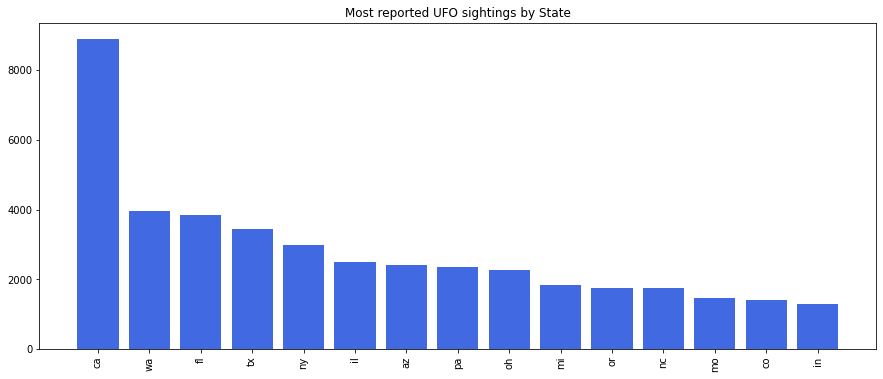

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(top_15_state.index, top_15_state['comments']
       ,color='royalblue')
plt.title('Most reported UFO sightings by State')
plt.xticks(rotation=90)

In [ ]:
df_cities = pd.DataFrame(df.groupby('city')['comments'].nunique())
top_15_cities = df_cities.sort_values('comments', ascending=False)[:15]
top_15_cities

,comments
city,
seattle,523
phoenix,454
portland,373
las vegas,367
los angeles,351
san diego,337
houston,296
chicago,264
tucson,241


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

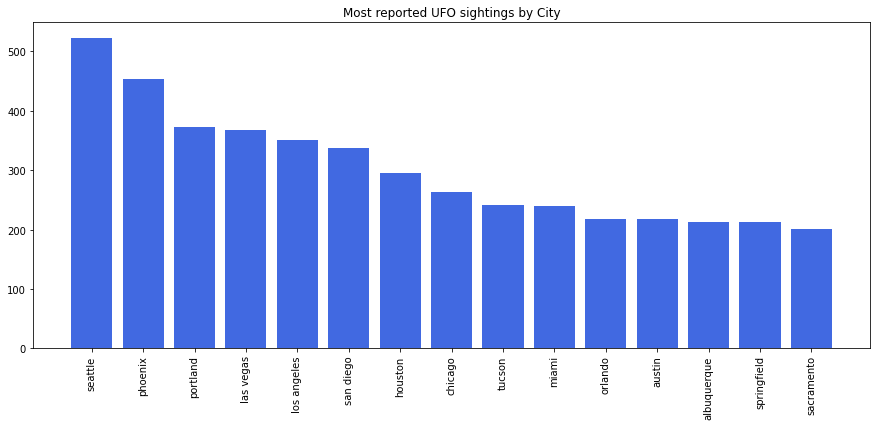

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(top_15_cities.index, top_15_cities['comments']
       ,color='royalblue')
plt.title('Most reported UFO sightings by City')
plt.xticks(rotation=90)

In [ ]:
df_dates = pd.DataFrame(df.groupby('datetime')['comments'].nunique())
top_15_dates = df_dates.sort_values('comments', ascending=False)[:15]
top_15_dates

,comments
datetime,
2010-07-04,183
2012-07-04,166
1999-11-16,161
2013-07-04,156
2011-07-04,132
2009-09-19,110
2014-01-01,89
2004-10-31,80
2013-12-31,79


Find Relative Popular Events of  UFO reporting data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

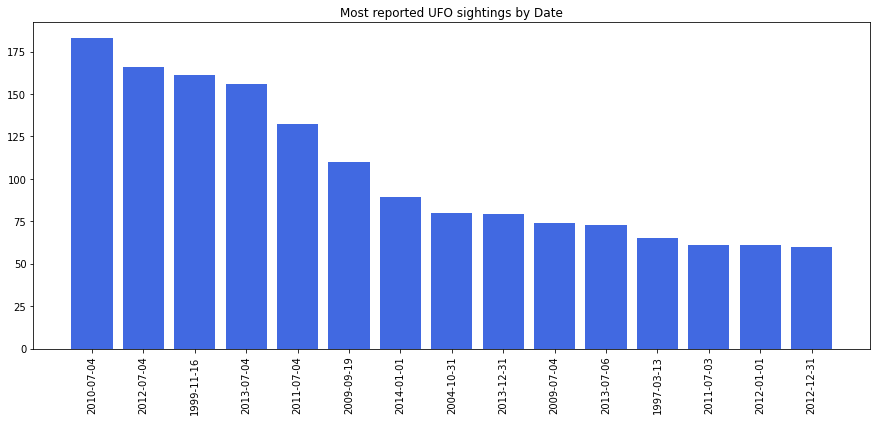

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(top_15_dates.index, top_15_dates['comments']
       ,color='royalblue')
plt.title('Most reported UFO sightings by Date')
plt.xticks(rotation=90)

In [ ]:
df['duration (seconds)'].describe()

count    6.509900e+04
mean     5.801160e+03
std      4.045601e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      6.627600e+07
Name: duration (seconds), dtype: float64

In [ ]:
plt.subplots(figsize=(20,8))
ax = sns.histplot(df['duration (seconds)'], palette="PuBuGn")
plt.title('Duration od UFO Sightings')
plt.ylabel('Number of UFO sightings')
plt.xlabel('Duration in seconds')

In [3]:
# Polarity: using TextBlob, asssess the sentiment of each report text: negative sentiment(-1) and positive sentiment(+1)

def explore_sentiment_polarity(df, neg_threshold, pos_threshold):
    for i in range(0,len(df)): 
        text = df.iloc[i]['comments']
        report_test = TextBlob(text)
        if report_test.sentiment.polarity < neg_threshold or report_test.sentiment.polarity > pos_threshold:
            print ('Row_ID:',i, report_test.sentiment.polarity)
            print (text, '\n')

            
explore_sentiment_polarity(df, -0.75, 0.75)

Row_ID: 141 0.9100000000000001
A oval shaped object hovered and shot through the sky with very bright lights and then vanished. 500 Lights On Object0: Yes 

Row_ID: 477 0.8
Three gold circle UFOs fly in formation&#44 warp drive away and disappear. 

Row_ID: 534 -0.8
burnt out disk  gets ride from trucker to air force base 

Row_ID: 616 0.8
stars that fly 

Row_ID: 655 0.9100000000000001
I WAS LEAVING EL RENO&#44OKLAHOMA&#44APPROXIMATELY 40 MILES WEST OF OKC ABOUT 9PM. TRAVELING NORTH ON HWY 81 I NOTICED A VERY BRIGHT STAR-LIK 

Row_ID: 693 0.8
I was standing on my deck facing east when I saw orange objects fly from north to south. They appeared to maybe be comets but I cannot 

Row_ID: 869 0.9
Two Brilliant Star objects in twilight sky 

Row_ID: 1038 0.9
Brilliant  shimmering gold object sighted 1 hr after sunset 

Row_ID: 1170 0.8
Unidentified box looking object flying across Denver Metropolitan area under intelligent control. 

Row_ID: 1535 -0.8
Disc follows fighter jets to air base 

In [4]:
# Subjectivity: using TextBlob, assess corpus for subjectivity: very objective(0) and very subjective(1)

def explore_sentiment_subjectivity(df, sub_threshold, obj_threshold):
    
    subjective = 0
    neutral = 0
    objective = 0
    
    for i in range(0,len(df)): 
        text = df.iloc[i]['comments']
        report_test = TextBlob(text)
        if report_test.sentiment.subjectivity > sub_threshold:
            subjective += 1
        if report_test.sentiment.subjectivity < obj_threshold:
            objective += 1

    print ('Subjective', subjective)
    print ('Objective', objective)
    
    
explore_sentiment_subjectivity(df, 0.5, 0.2)

Subjective 5536
Objective 7193


In [5]:
total = len(df)
print(total)

20882


In [ ]:
import requests
#from mpl_toolkits.basemap import Basemap
#!pip install Basemap
!apt-get -qq install -y libgeos-3.5.0
!apt-get -qq install -y libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Selecting previously unselected package libgeos-dev.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     / 203.1MB 81.0MB/s
     |████████████████████████████████| 6.5MB 5.6MB/s 
     |████████████████████████████████| 225kB 45.2MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756184 sha256=b1d9afbb6181cfe93bd6801a18716496446fce9cf105530a1eb41e6603204917
  Stored in directory: /tmp/pip-ephem-wheel-cache-2vukm131/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=5077ec1ae0

In [ ]:
from mpl_toolkits.basemap import Basemap